In [1]:

RAPIDAPIKEY = ''    # <-- FIXME.  Enter your key here.



In [2]:
import http.client
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [3]:
conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': RAPIDAPIKEY
    }

In [4]:

conn.request("GET", "/v2/leagueTable/524", headers=headers)

resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
persons = json.loads(data)

<class 'str'>
{"api":{"results":1,"standings":[[{"rank":1,"team_id":40,"teamName":"Liverpool","logo":"https:\/\/media.api-sports.io\/football\/teams\/40.png","group":"Premier League","forme":"WWLDW","status":"same","description":"Promotion - Champions League (Group Stage)","all":{"matchsPlayed":38,"win":32,"draw":3,"lose":3,"goalsFor":85,"goalsAgainst":33},"home":{"matchsPlayed":19,"win":18,"draw":1,"lose":0,"goalsFor":52,"goalsAgainst":16},"away":{"matchsPlayed":19,"win":14,"draw":2,"lose":3,"goalsFor":33,"goalsAgainst":17},"goalsDiff":52,"points":99,"lastUpdate":"2020-07-26"},{"rank":2,"team_id":50,"teamName":"Manchester City","logo":"https:\/\/media.api-sports.io\/football\/teams\/50.png","group":"Premier League","forme":"WWWWW","status":"same","description":"Promotion - Champions League (Group Stage)","all":{"matchsPlayed":38,"win":26,"draw":3,"lose":9,"goalsFor":102,"goalsAgainst":35},"home":{"matchsPlayed":19,"win":15,"draw":2,"lose":2,"goalsFor":57,"goalsAgainst":13},"away":{"ma

In [5]:
persons.keys()

dict_keys(['api'])

In [6]:
persons

{'api': {'results': 1,
  'standings': [[{'rank': 1,
     'team_id': 40,
     'teamName': 'Liverpool',
     'logo': 'https://media.api-sports.io/football/teams/40.png',
     'group': 'Premier League',
     'forme': 'WWLDW',
     'status': 'same',
     'description': 'Promotion - Champions League (Group Stage)',
     'all': {'matchsPlayed': 38,
      'win': 32,
      'draw': 3,
      'lose': 3,
      'goalsFor': 85,
      'goalsAgainst': 33},
     'home': {'matchsPlayed': 19,
      'win': 18,
      'draw': 1,
      'lose': 0,
      'goalsFor': 52,
      'goalsAgainst': 16},
     'away': {'matchsPlayed': 19,
      'win': 14,
      'draw': 2,
      'lose': 3,
      'goalsFor': 33,
      'goalsAgainst': 17},
     'goalsDiff': 52,
     'points': 99,
     'lastUpdate': '2020-07-26'},
    {'rank': 2,
     'team_id': 50,
     'teamName': 'Manchester City',
     'logo': 'https://media.api-sports.io/football/teams/50.png',
     'group': 'Premier League',
     'forme': 'WWWWW',
     'status': 'sam

In [7]:
team = []
homewin = []
awaywin = []
homeloss=[]
awayloss = []
totalplayed=[]
goalsDiff = []

for i in range(20):
    team.append(persons['api']['standings'][0][i]['teamName'])
    totalplayed.append(persons['api']['standings'][0][i]['all']['matchsPlayed'])
    homewin.append(persons['api']['standings'][0][i]['home']['win'])
    awaywin.append(persons['api']['standings'][0][i]['away']['win'])
    homeloss.append(persons['api']['standings'][0][i]['home']['lose'])
    awayloss.append(persons['api']['standings'][0][i]['away']['lose'])
    goalsDiff.append(persons['api']['standings'][0][i]['goalsDiff'])
    
print(homewin)
print(awaywin)
print(homeloss)
print(awayloss)
team
goalsDiff

[18, 15, 10, 11, 11, 12, 8, 10, 10, 8, 6, 8, 6, 6, 5, 6, 7, 5, 6, 4]
[14, 11, 8, 9, 7, 4, 7, 4, 4, 7, 9, 5, 5, 5, 4, 4, 2, 4, 2, 1]
[0, 2, 2, 5, 4, 4, 4, 3, 6, 7, 10, 4, 5, 8, 7, 9, 9, 8, 7, 12]
[3, 7, 6, 7, 8, 7, 5, 7, 6, 7, 6, 11, 11, 9, 8, 10, 12, 14, 13, 15]


[52,
 67,
 30,
 15,
 26,
 14,
 11,
 8,
 0,
 -7,
 -9,
 -12,
 -20,
 -19,
 -15,
 -13,
 -26,
 -25,
 -28,
 -49]

In [8]:
stats_df_BAD = pd.DataFrame(persons['api']['standings'][0])
stats_df_BAD

,rank,team_id,teamName,logo,group,forme,status,description,all,home,away,goalsDiff,points,lastUpdate
0,1,40,Liverpool,https://media.api-sports.io/football/teams/40.png,Premier League,WWLDW,same,Promotion - Champions League (Group Stage),"{'matchsPlayed': 38, 'win': 32, 'draw': 3, 'lo...","{'matchsPlayed': 19, 'win': 18, 'draw': 1, 'lo...","{'matchsPlayed': 19, 'win': 14, 'draw': 2, 'lo...",52,99,2020-07-26
1,2,50,Manchester City,https://media.api-sports.io/football/teams/50.png,Premier League,WWWWW,same,Promotion - Champions League (Group Stage),"{'matchsPlayed': 38, 'win': 26, 'draw': 3, 'lo...","{'matchsPlayed': 19, 'win': 15, 'draw': 2, 'lo...","{'matchsPlayed': 19, 'win': 11, 'draw': 1, 'lo...",67,81,2020-07-26
2,3,33,Manchester United,https://media.api-sports.io/football/teams/33.png,Premier League,WDWDW,same,Promotion - Champions League (Group Stage),"{'matchsPlayed': 38, 'win': 18, 'draw': 12, 'l...","{'matchsPlayed': 19, 'win': 10, 'draw': 7, 'lo...","{'matchsPlayed': 19, 'win': 8, 'draw': 5, 'los...",30,66,2020-07-26
3,4,49,Chelsea,https://media.api-sports.io/football/teams/49.png,Premier League,WLWLW,same,Promotion - Champions League (Group Stage),"{'matchsPlayed': 38, 'win': 20, 'draw': 6, 'lo...","{'matchsPlayed': 19, 'win': 11, 'draw': 3, 'lo...","{'matchsPlayed': 19, 'win': 9, 'draw': 3, 'los...",15,66,2020-07-26
4,5,46,Leicester,https://media.api-sports.io/football/teams/46.png,Premier League,LLWLD,same,Promotion - Europa League (Group Stage),"{'matchsPlayed': 38, 'win': 18, 'draw': 8, 'lo...","{'matchsPlayed': 19, 'win': 11, 'draw': 4, 'lo...","{'matchsPlayed': 19, 'win': 7, 'draw': 4, 'los...",26,62,2020-07-26
5,6,47,Tottenham,https://media.api-sports.io/football/teams/47.png,Premier League,DWWWD,same,Promotion - Europa League (Qualification),"{'matchsPlayed': 38, 'win': 16, 'draw': 11, 'l...","{'matchsPlayed': 19, 'win': 12, 'draw': 3, 'lo...","{'matchsPlayed': 19, 'win': 4, 'draw': 8, 'los...",14,59,2020-07-26
6,7,39,Wolves,https://media.api-sports.io/football/teams/39.png,Premier League,LWDWL,same,None,"{'matchsPlayed': 38, 'win': 15, 'draw': 14, 'l...","{'matchsPlayed': 19, 'win': 8, 'draw': 7, 'los...","{'matchsPlayed': 19, 'win': 7, 'draw': 7, 'los...",11,59,2020-07-26
7,8,42,Arsenal,https://media.api-sports.io/football/teams/42.png,Premier League,WLWLD,same,None,"{'matchsPlayed': 38, 'win': 14, 'draw': 14, 'l...","{'matchsPlayed': 19, 'win': 10, 'draw': 6, 'lo...","{'matchsPlayed': 19, 'win': 4, 'draw': 8, 'los...",8,56,2020-07-26
8,9,62,Sheffield Utd,https://media.api-sports.io/football/teams/62.png,Premier League,LLLWW,same,None,"{'matchsPlayed': 38, 'win': 14, 'draw': 12, 'l...","{'matchsPlayed': 19, 'win': 10, 'draw': 3, 'lo...","{'matchsPlayed': 19, 'win': 4, 'draw': 9, 'los...",0,54,2020-07-26
9,10,44,Burnley,https://media.api-sports.io/football/teams/44.png,Premier League,LWDDW,same,None,"{'matchsPlayed': 38, 'win': 15, 'draw': 9, 'lo...","{'matchsPlayed': 19, 'win': 8, 'draw': 4, 'los...","{'matchsPlayed': 19, 'win': 7, 'draw': 5, 'los...",-7,54,2020-07-26


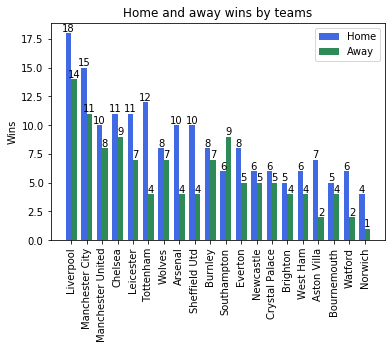

In [9]:
#Liverpools Dominance
#homewin awaywin homeloss awayloss
width = 0.35       # the width of the bars

N=20
ind = np.arange(N)
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, homewin, width, color='royalblue')

rects2 = ax.bar(ind+width, awaywin, width, color='seagreen')

# add some
ax.set_ylabel('Wins')
ax.set_title('Home and away wins by teams')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(team, rotation=90)

ax.legend( (rects1[0], rects2[0]), ('Home', 'Away') )
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('ax.png')

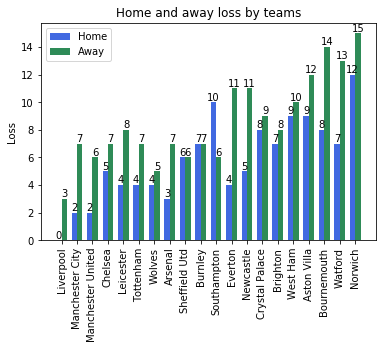

In [10]:
#Liverpools Dominance
width = 0.35       # the width of the bars

N=20
ind = np.arange(N)
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, homeloss, width, color='royalblue')

rects2 = ax.bar(ind+width, awayloss, width, color='seagreen')

# add some

ax.set_ylabel('Loss')
ax.set_title('Home and away loss by teams')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(team, rotation=90)

ax.legend( (rects1[0], rects2[0]), ('Home', 'Away') )
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
fig.savefig('ax1.png')

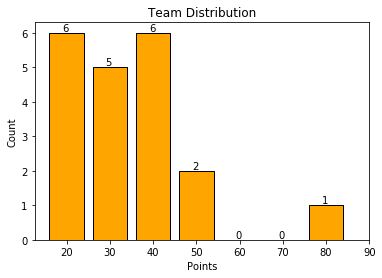

In [208]:
# Liverpools Dominance
z = []
for i in range(20):
        z.append(persons['api']['standings'][0][i]['points'])

ymin = min(z)

ymax = max(z)

plt.title("Team Distribution")
plt.ylabel('Count')
plt.xlabel('Points')
bi = [20,30,40,50,60,70,80,90]
counts, bins,_= plt.hist(z,bins =bi,rwidth =0.80, range = (ymin,ymax),color = 'orange',edgecolor = 'black',align="left")
plt.xticks(bins)
for n, b in zip(counts, bins):
        plt.gca().text(b-1, n+0.05, int(n));
plt.savefig('ax2.png')

In [11]:
Points=[]

for i in range(20):
    Points.append(persons['api']['standings'][0][i]['points'])
Points

[99,
 81,
 66,
 66,
 62,
 59,
 59,
 56,
 54,
 54,
 52,
 49,
 44,
 43,
 41,
 39,
 35,
 34,
 34,
 21]

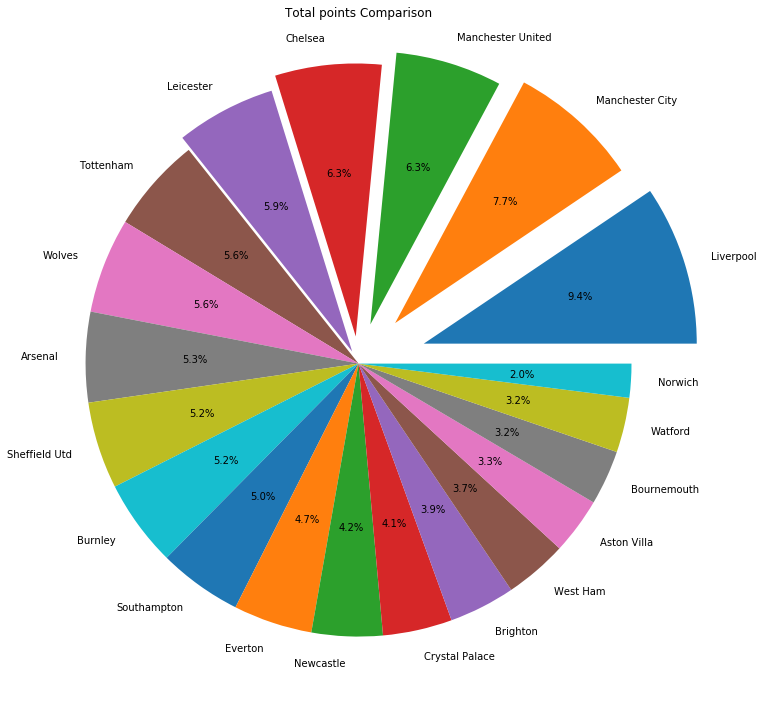

In [12]:
#Liverpools Dominance
fig1, ax1 = plt.subplots(figsize=(30,10))
explode = (0.25, 0.2, 0.15, 0.1,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
ax1.pie(Points,labels = team,shadow = False,startangle = 0,autopct='%1.1f%%',explode = explode)
ax1.set(Title = "Total points Comparison")

plt.tight_layout()
fig1.savefig('ax3.png')

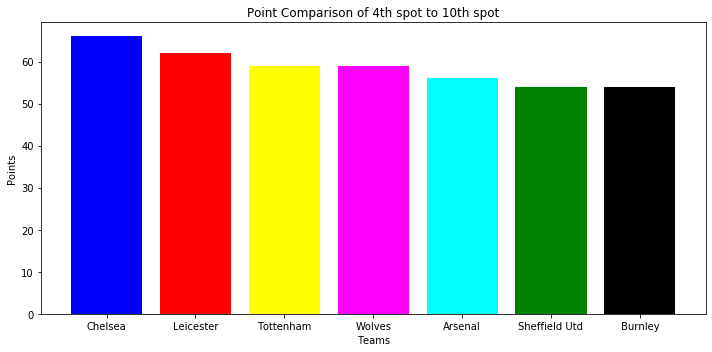

In [13]:
# Tight Run for the last Champions league spot
x = []
y = []
for i in range(20):
    if(4 <=  persons['api']['standings'][0][i]['rank'] <= 10):
        x.append(persons['api']['standings'][0][i]['teamName'])
        y.append(persons['api']['standings'][0][i]['points'])
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set(Title = 'Point Comparison of 4th spot to 10th spot',xlabel = "Teams",ylabel = "Points")

ax1.bar(x,y,color = ['blue','red','yellow','magenta','cyan','green','black'])
plt.tight_layout()
fig1.savefig('ax4.png')



In [14]:
#Relegation Battle
rel_teams = []
rel_points = []
for i in range(20):
    if(persons['api']['standings'][0][i]['points']<35):
        rel_teams.append(persons['api']['standings'][0][i]['teamName'])
        rel_points.append(persons['api']['standings'][0][i]['points'])
    


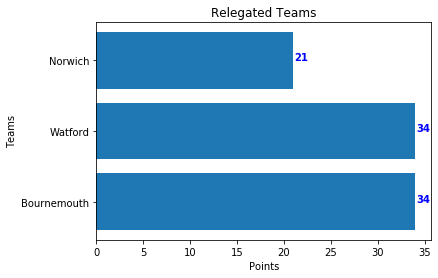

In [16]:
fig, ax = plt.subplots()    
ax.barh(rel_teams,rel_points)

for i, v in enumerate(rel_points):
    ax.text(v + 0.1, i + 0, str(v), color='blue', fontweight='bold')
ax.set(Title = "Relegated Teams",xlabel = "Points",ylabel = "Teams");
fig.savefig('ax5.png')



